In [1]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("train.csv")


In [120]:
df

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [121]:
df = df.drop(["Name", "id"], axis=1) #убираем столбцы, неважные для анализа

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 140700 non-null  object 
 1   Age                                    140700 non-null  float64
 2   City                                   140700 non-null  object 
 3   Working Professional or Student        140700 non-null  object 
 4   Profession                             104070 non-null  object 
 5   Academic Pressure                      27897 non-null   float64
 6   Work Pressure                          112782 non-null  float64
 7   CGPA                                   27898 non-null   float64
 8   Study Satisfaction                     27897 non-null   float64
 9   Job Satisfaction                       112790 non-null  float64
 10  Sleep Duration                         140700 non-null  

In [123]:
df.shape

(140700, 18)

In [10]:
df.dtypes #уже примерно понимаем, что категориальное, а что непрерывное

id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [124]:
#проверяем пропуски
missing_counts = df.isna().sum()
missing_counts

Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [ ]:
#относительное число пропусков
missing_count= df.isnull().sum().sort_values(ascending=False)
missing_count= missing_count[missing_count > 0]
missing_percent = (missing_count/len(df)) * 100

df_missing = pd.DataFrame({'Missing train values: counts': missing_count, "Missing train values: percentage": missing_percent.round(3)})
df_missing
#Посмотрев на датасет, мы видим,  что избавляться от признаков с пропусками нельзя,
#так как у них очень большая корреляция с Working Professional or Student

,Missing train values: counts,Missing train values: percentage
Study Satisfaction,112803,80.173
Academic Pressure,112803,80.173
CGPA,112802,80.172
Profession,36630,26.034
Work Pressure,27918,19.842
Job Satisfaction,27910,19.837
Dietary Habits,4,0.003
Financial Stress,4,0.003
Degree,2,0.001


In [113]:
#числовые признаки
numeric = [ 'Age','Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
        'Work/Study Hours',
       'Financial Stress']


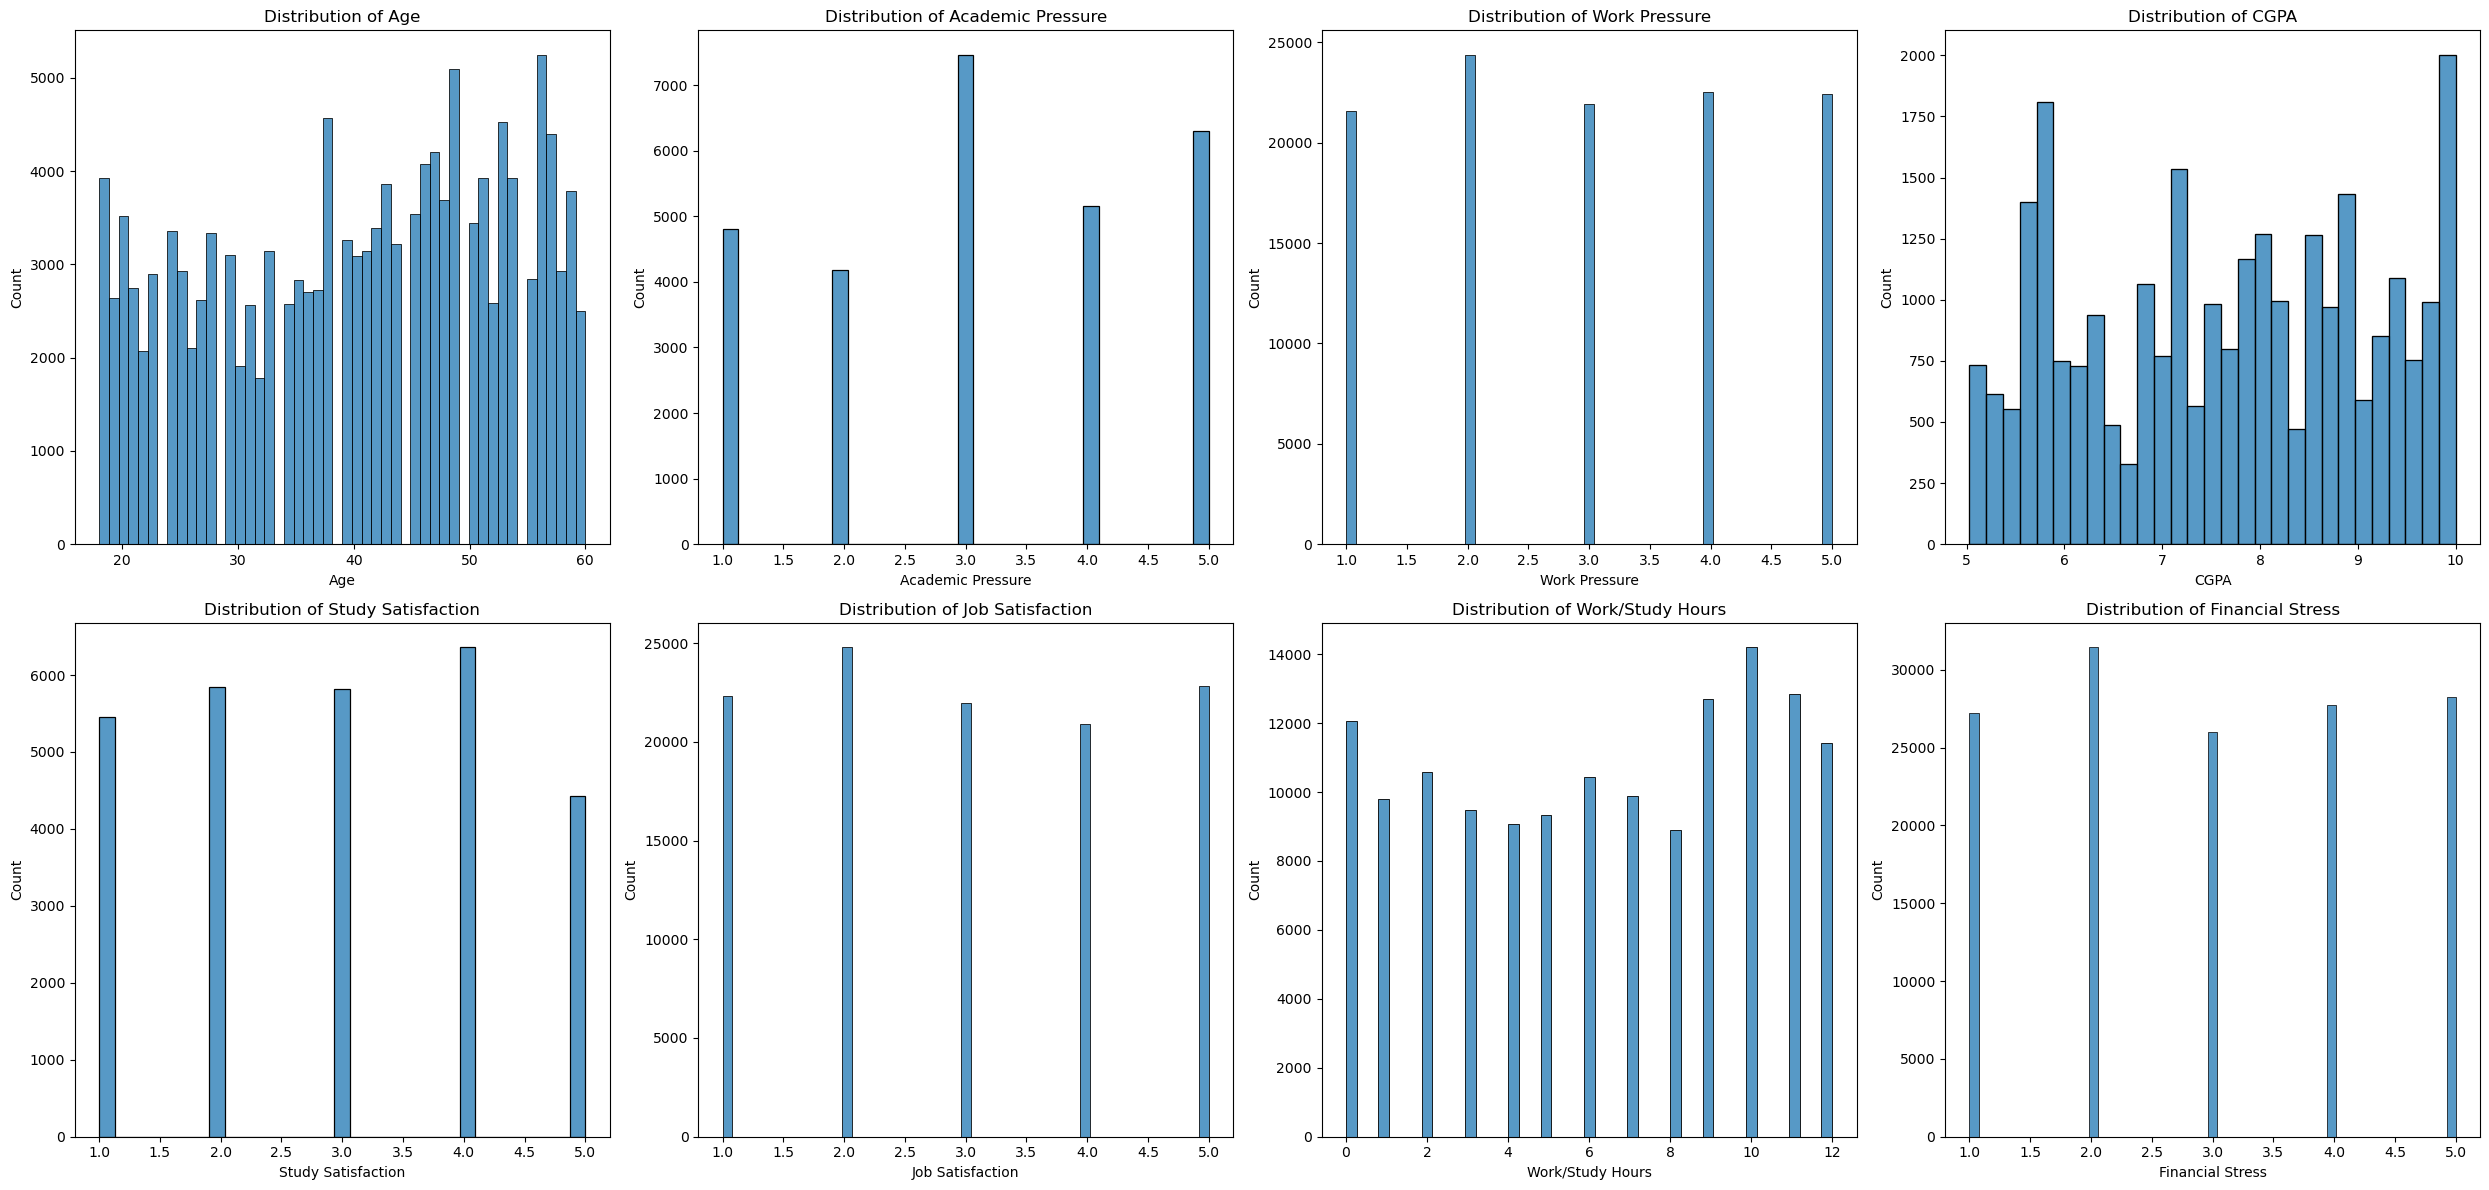

In [127]:
#смотрим распределения числовых признаков
fig, axes = plt.subplots(2, 4, figsize=(25, 12))
axes = axes.ravel()  

for idx, cat in enumerate(numeric):
    sns.histplot(data=df, x=cat, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {cat}')

plt.tight_layout()

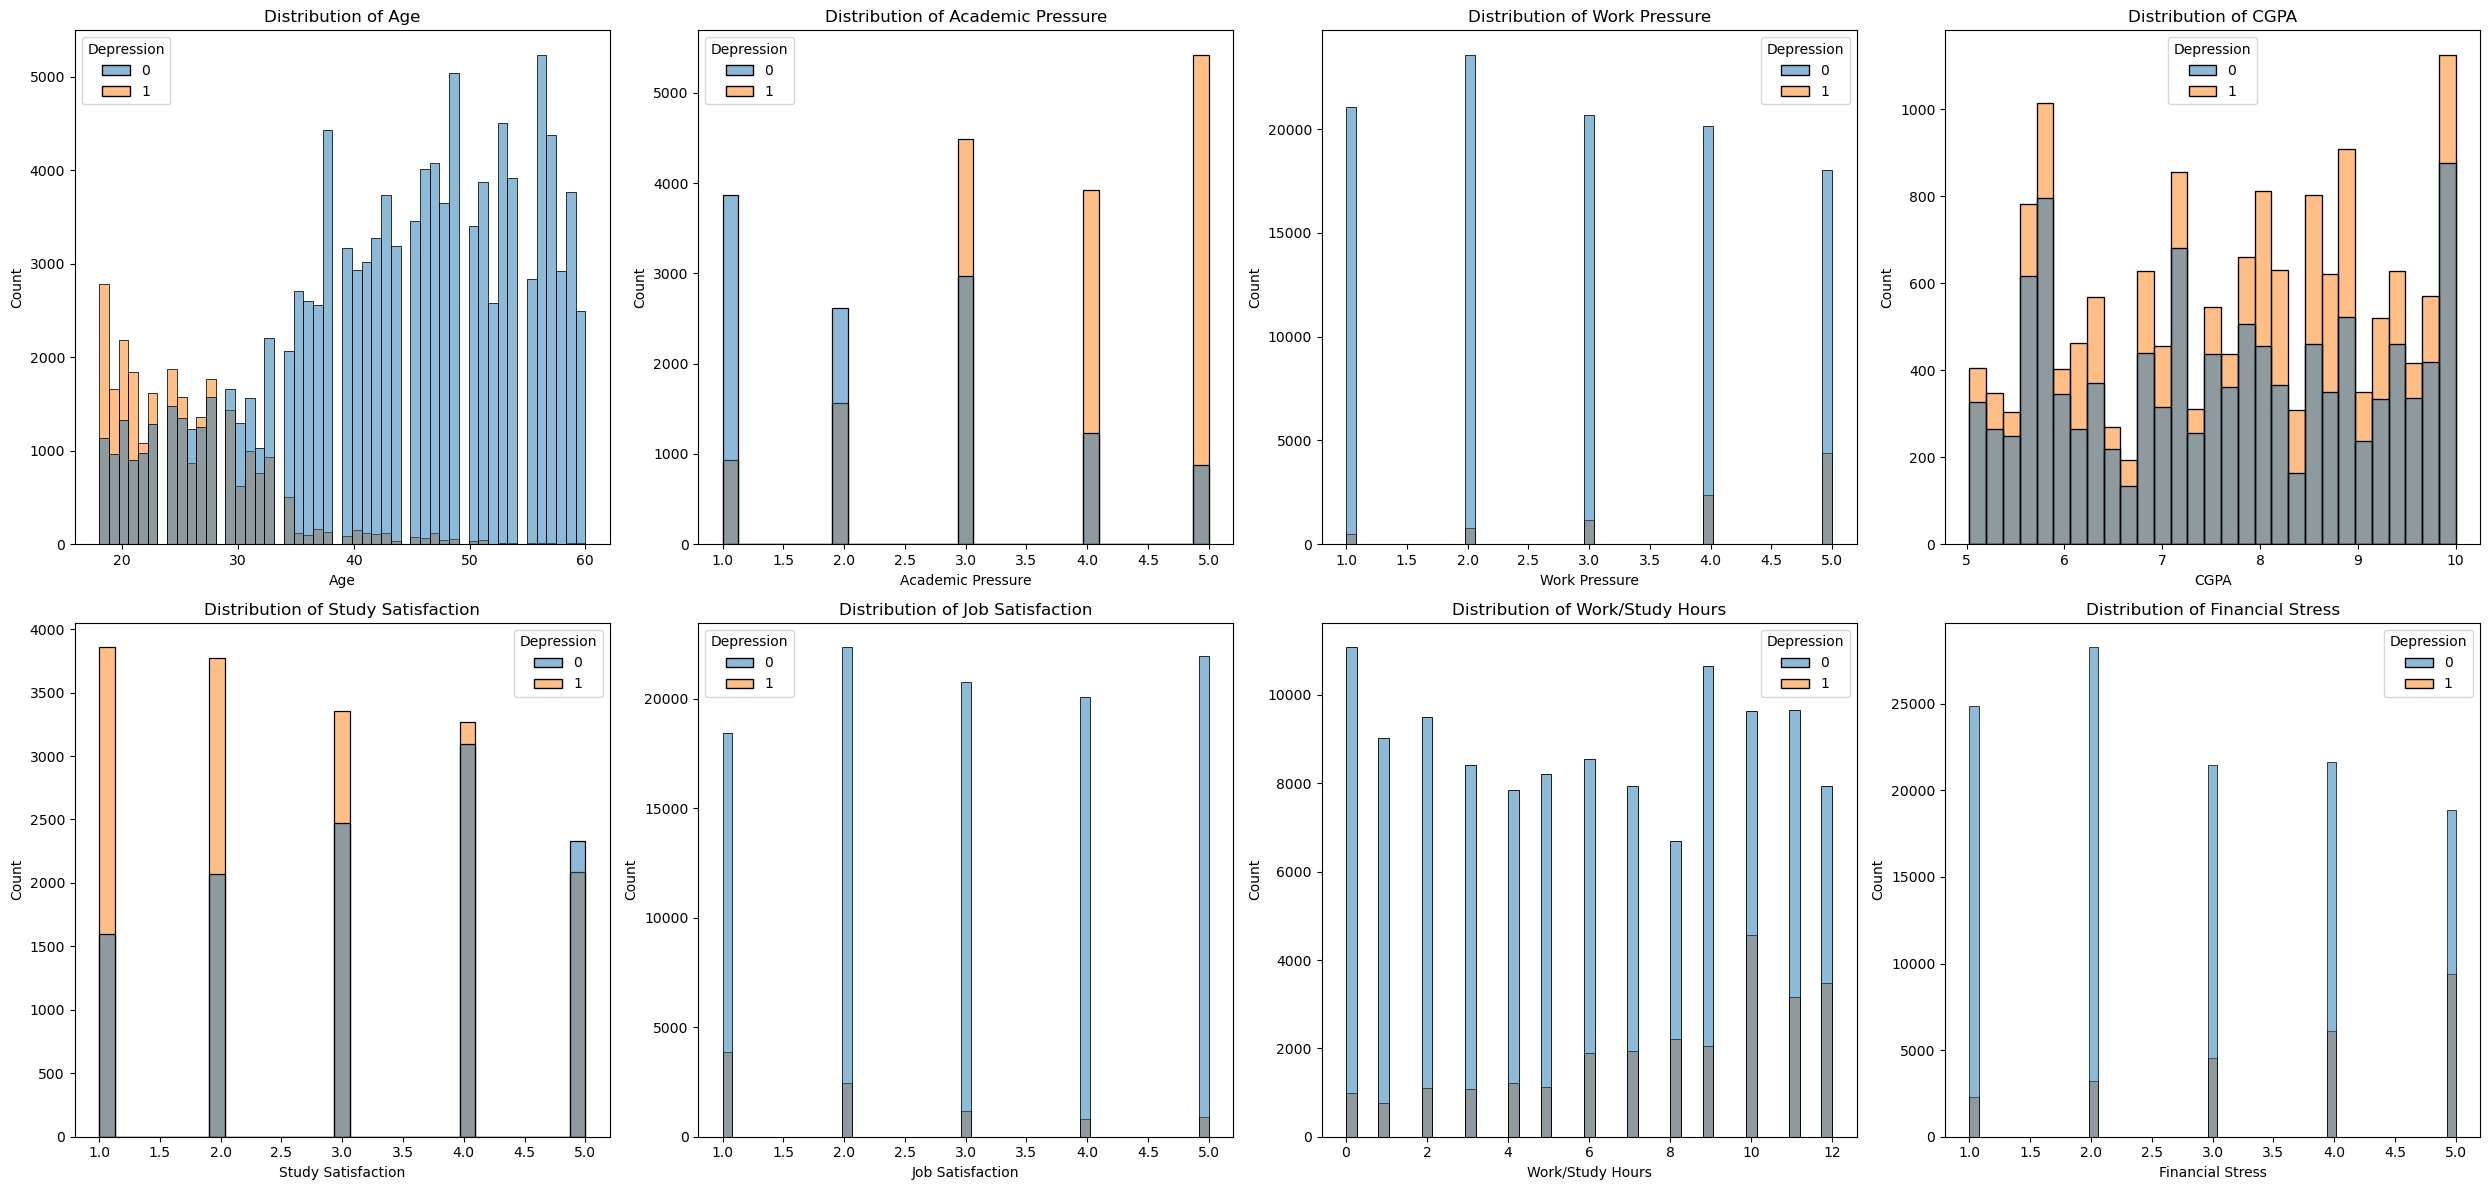

In [128]:
#смотрим распределения числовых признаков с учётом целевой перемнной
fig, axes = plt.subplots(2, 4, figsize=(25, 12))
axes = axes.ravel()  # Преобразуем в плоский массив

for idx, cat in enumerate(numeric):
    sns.histplot(data=df,hue='Depression', x=cat, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {cat}')

plt.tight_layout()

In [ ]:
#Проверка выбросов

<Axes: ylabel='Age'>

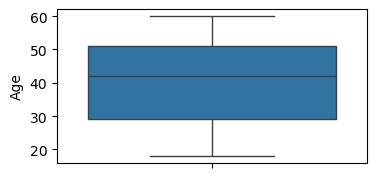

In [129]:
plt.figure(figsize=(4, 2))
sns.boxplot(data=df['Age'])

<Axes: >

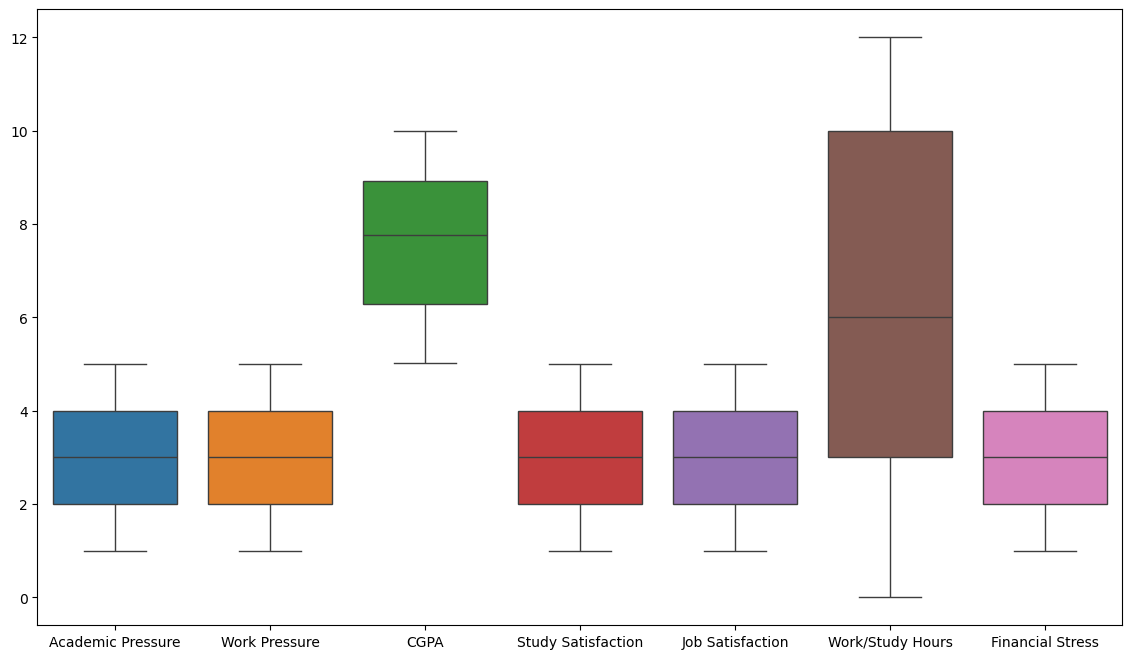

In [130]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[[ 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Work/Study Hours',
       'Financial Stress']])

In [ ]:
#Видим, что выбросы в числовых признаках отсутсвуют

In [131]:
#Считаем основные параментры
for cat in numeric:
    print(cat+' info')
    print(df[cat].describe(percentiles=[0.5]))
    print()

Age info
count    140700.000000
mean         40.388621
std          12.384099
min          18.000000
50%          42.000000
max          60.000000
Name: Age, dtype: float64

Academic Pressure info
count    27897.000000
mean         3.142273
std          1.380457
min          1.000000
50%          3.000000
max          5.000000
Name: Academic Pressure, dtype: float64

Work Pressure info
count    112782.000000
mean          2.998998
std           1.405771
min           1.000000
50%           3.000000
max           5.000000
Name: Work Pressure, dtype: float64

CGPA info
count    27898.000000
mean         7.658636
std          1.464466
min          5.030000
50%          7.770000
max         10.000000
Name: CGPA, dtype: float64

Study Satisfaction info
count    27897.000000
mean         2.944940
std          1.360197
min          1.000000
50%          3.000000
max          5.000000
Name: Study Satisfaction, dtype: float64

Job Satisfaction info
count    112790.000000
mean          2.974404


In [132]:
#Категориальные переменные
categories = ['Gender', 'City', 
              'Working Professional or Student', 'Profession',
              'Sleep Duration', 'Dietary Habits', 'Degree',
              'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
c_cats = ['Gender', 
              'Working Professional or Student',
              'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
nc_cats = ['City', 
               'Profession',
              'Sleep Duration', 'Dietary Habits', 'Degree',
              ]

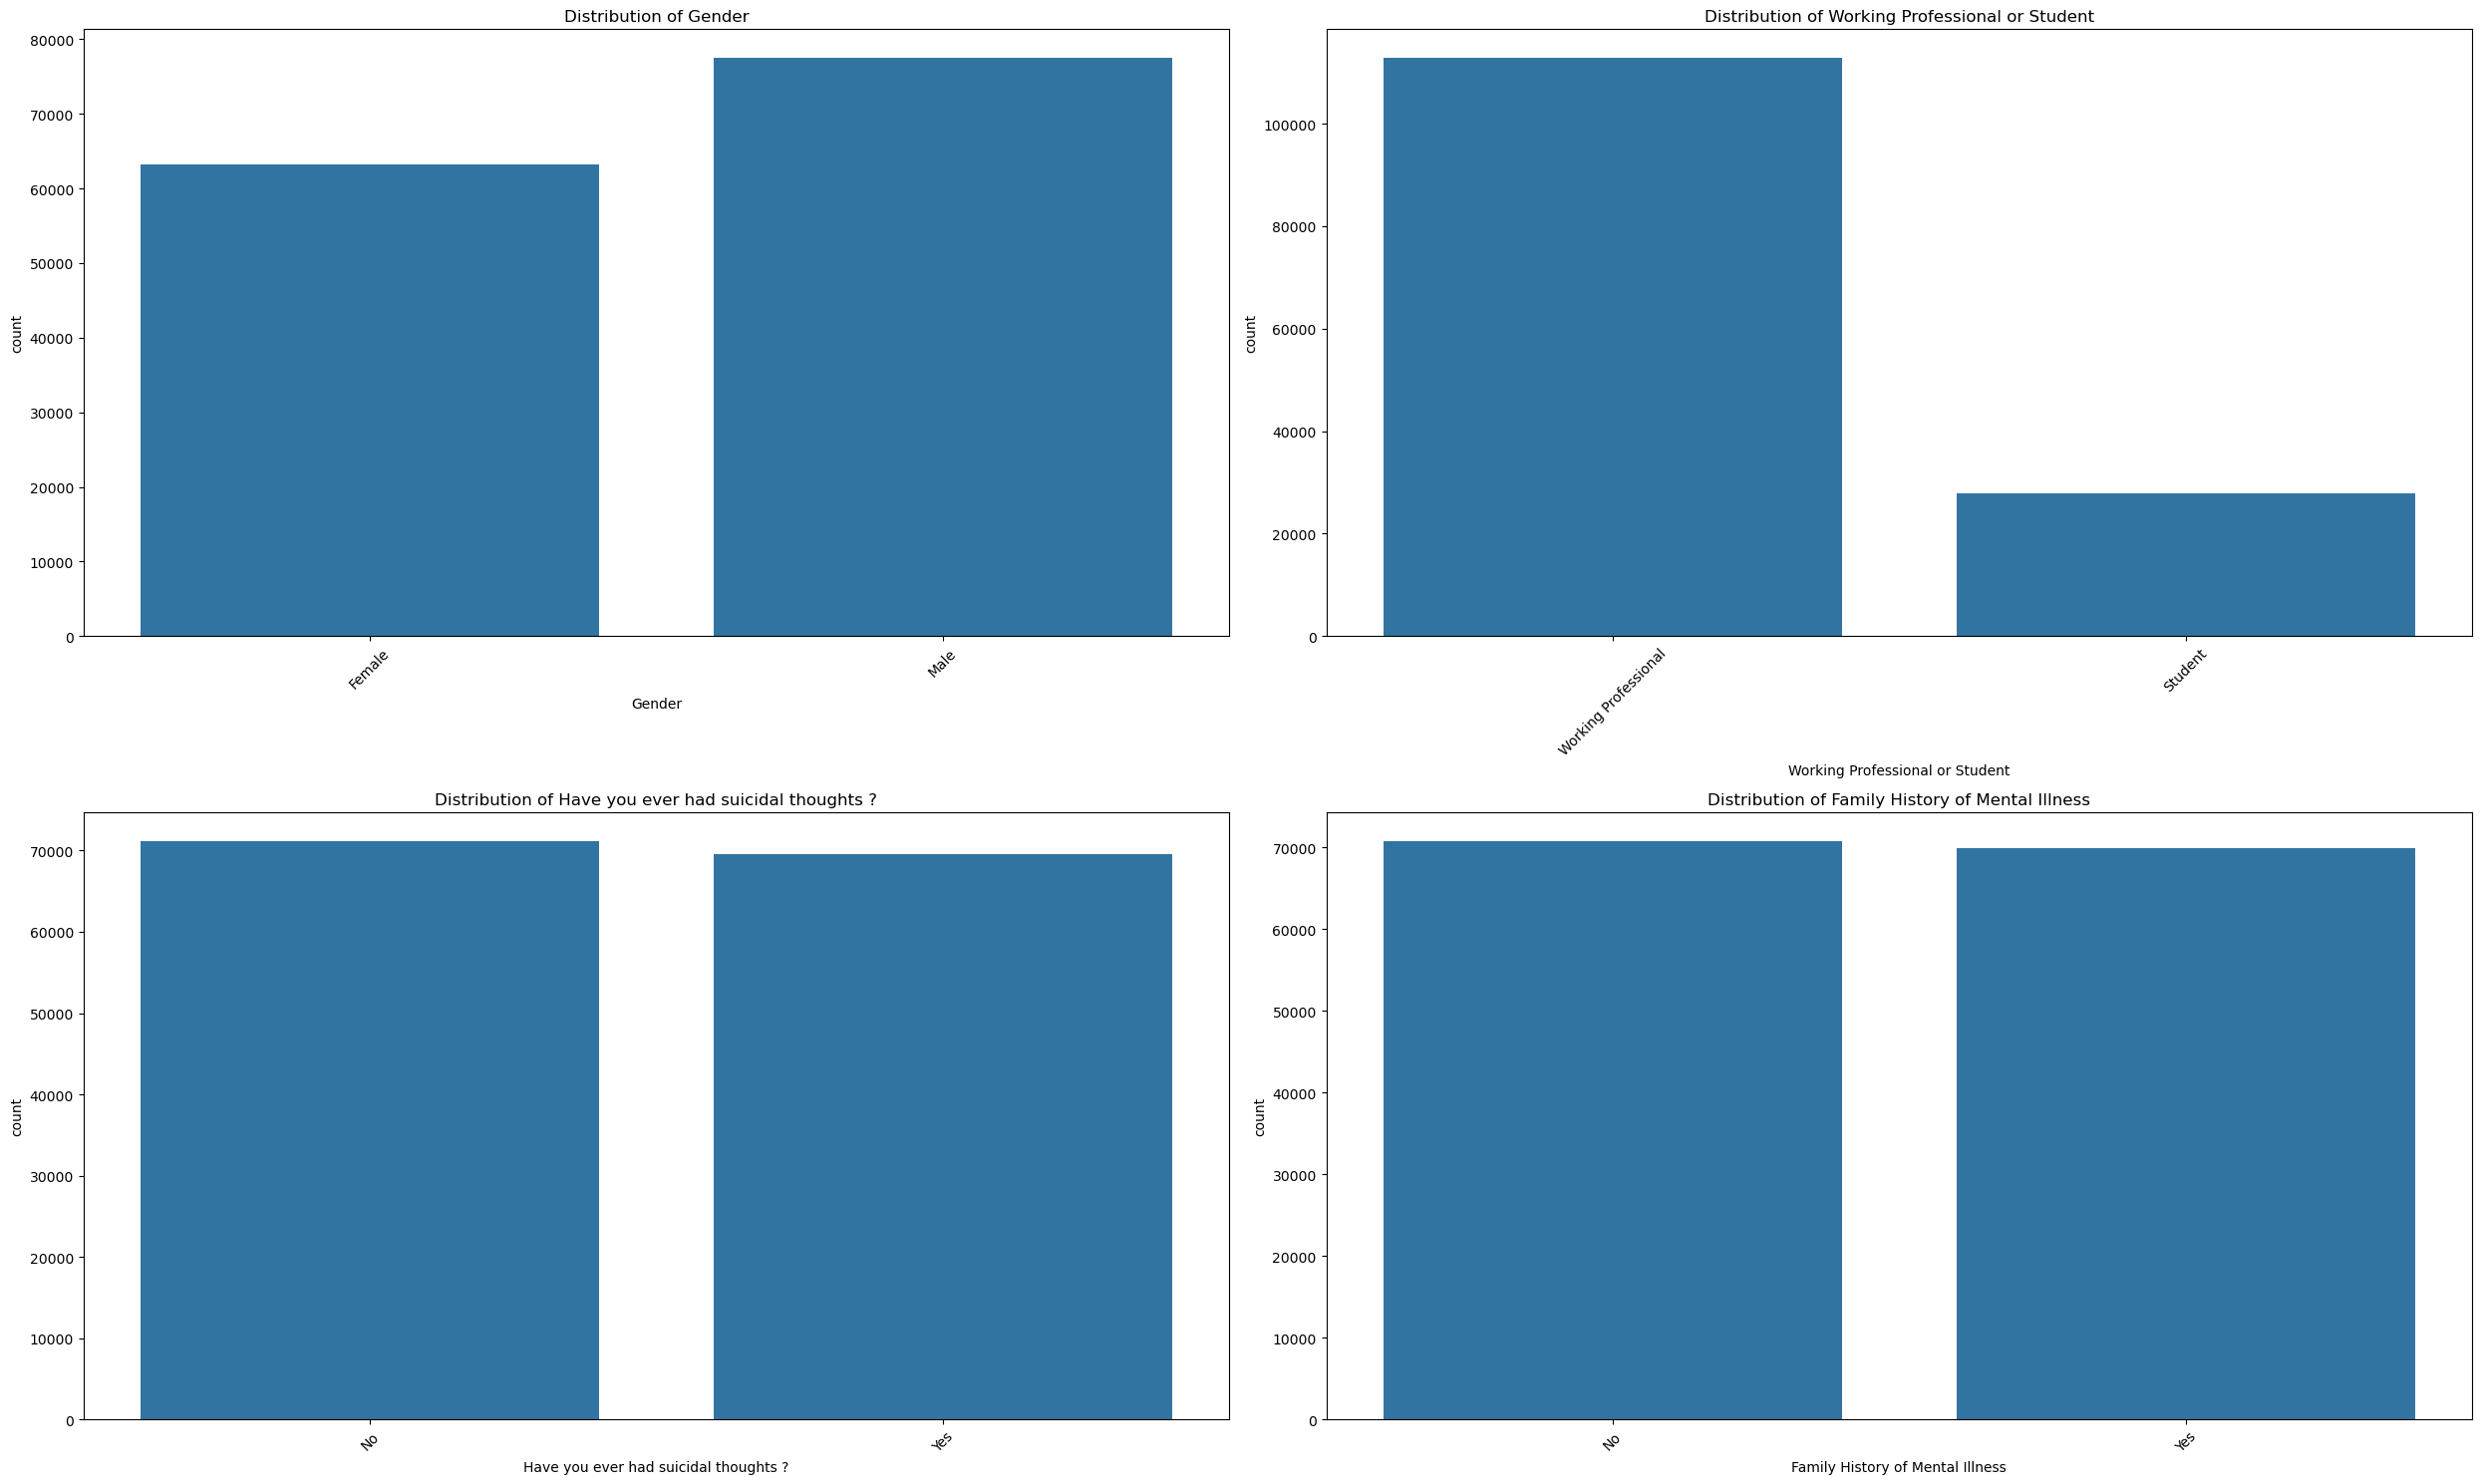

In [95]:
#Строим countplot для визуальзации соотношения категориальных перемнных
fig, axes = plt.subplots(2, 2, figsize=(25, 15))  
axes = axes.ravel()

for idx, cat in enumerate(c_cats):
    sns.countplot(data=df, x=cat, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {cat}')
    axes[idx].tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()
#Выборка студентов сильно меньше выборки работающих

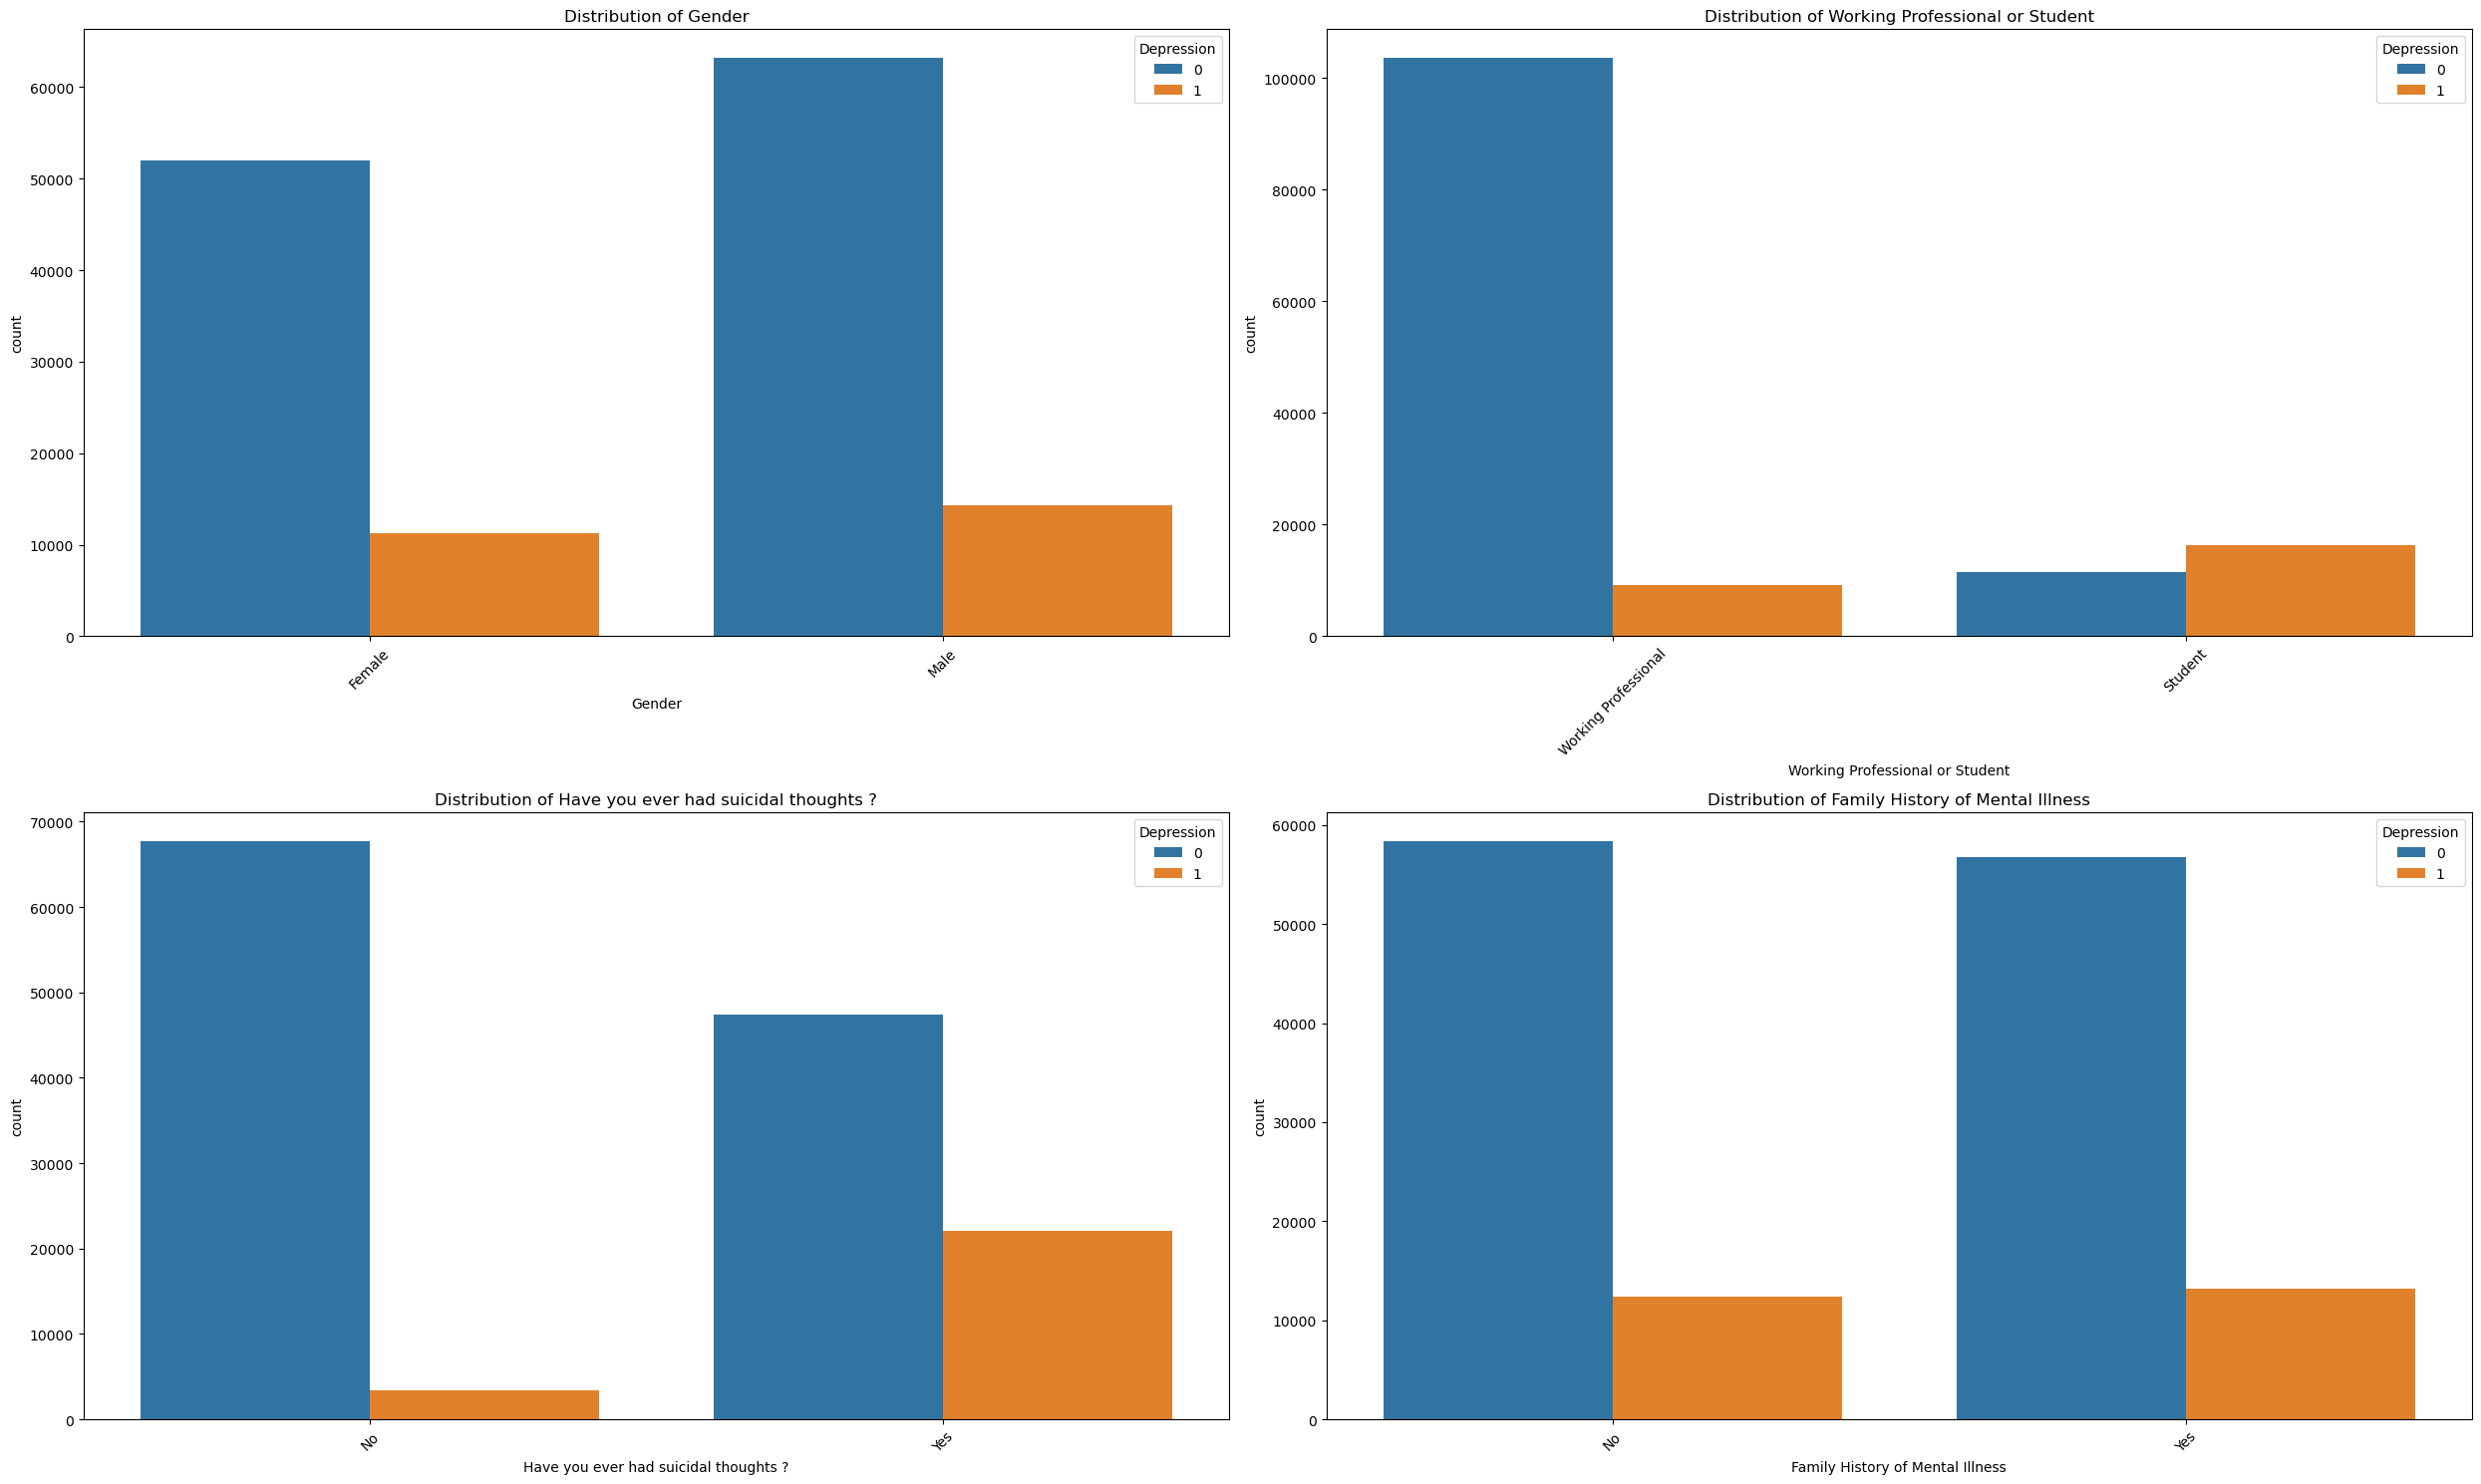

In [135]:
#Смотрим соотношение категориальных перемнных с целевой перемнной
fig, axes = plt.subplots(2, 2, figsize=(25, 15))  
axes = axes.ravel()

for idx, cat in enumerate(c_cats):
    sns.countplot(data=df,hue='Depression', x=cat, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {cat}')
    axes[idx].tick_params(axis='x', rotation=45)  

plt.tight_layout()
#Видим, что в целом людей с депрессией сильно меньше, чем  здоровых(что в принципе логично и исходит из логики). 
#Однако среди студентов страдающих депрессивным расстройством больше, чем здоровых. Можно предположить, что есть зависимость с возрастом. 
#Так же молодые люди более склонны к заботе о своём ментальном здоровье  

In [105]:
#Пороверяем выбросы в категориальных перменных
for cat in nc_cats:
    print(cat)
    print(df[cat].value_counts().head(40))  
    print()

City
City
Kalyan           6591
Patna            5924
Vasai-Virar      5765
Kolkata          5689
Ahmedabad        5613
Meerut           5528
Ludhiana         5226
Pune             5210
Rajkot           5207
Visakhapatnam    5176
Srinagar         5074
Mumbai           4966
Indore           4872
Agra             4684
Surat            4636
Varanasi         4606
Vadodara         4568
Hyderabad        4496
Kanpur           4398
Jaipur           4328
Thane            4289
Lucknow          4280
Nagpur           4209
Bangalore        4123
Chennai          4044
Ghaziabad        3620
Delhi            3593
Bhopal           3475
Faridabad        3268
Nashik           3144
Mihir               7
Nandini             4
Mahi                3
Vidya               3
City                3
Pratyush            3
Harsha              3
Saanvi              3
Bhavna              3
Molkata             2
Name: count, dtype: int64

Profession
Profession
Teacher                   24906
Content Writer             78

In [ ]:
#Видим, что есть во всех категориях есть "пороговое значение" после которого количество строк становится крайне малым
#Для решения таких выбросов я буду присваитвать other всем категориям, количество которых ниже порогового значения

In [89]:
#Анализ связи признаков с целевой переменной

In [91]:
df.corr(numeric_only=True)

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
Age,1.000000,-0.075956,-0.098924,0.005129,0.008862,0.030793,-0.118356,-0.083589,-0.564671
Academic Pressure,-0.075956,1.000000,NaN,-0.025195,-0.112228,-1.000000,0.095650,0.152105,0.475037
Work Pressure,-0.098924,NaN,1.000000,NaN,NaN,-0.036958,-0.002808,0.024412,0.216634
CGPA,0.005129,-0.025195,NaN,1.000000,-0.047078,1.000000,0.002875,0.006398,0.021729
Study Satisfaction,0.008862,-0.112228,NaN,-0.047078,1.000000,-1.000000,-0.036934,-0.065001,-0.168014
Job Satisfaction,0.030793,-1.000000,-0.036958,1.000000,-1.000000,1.000000,-0.029227,-0.029160,-0.168543
Work/Study Hours,-0.118356,0.095650,-0.002808,0.002875,-0.036934,-0.029227,1.000000,0.036134,0.191746
Financial Stress,-0.083589,0.152105,0.024412,0.006398,-0.065001,-0.029160,0.036134,1.000000,0.227237
Depression,-0.564671,0.475037,0.216634,0.021729,-0.168014,-0.168543,0.191746,0.227237,1.000000


<Axes: >

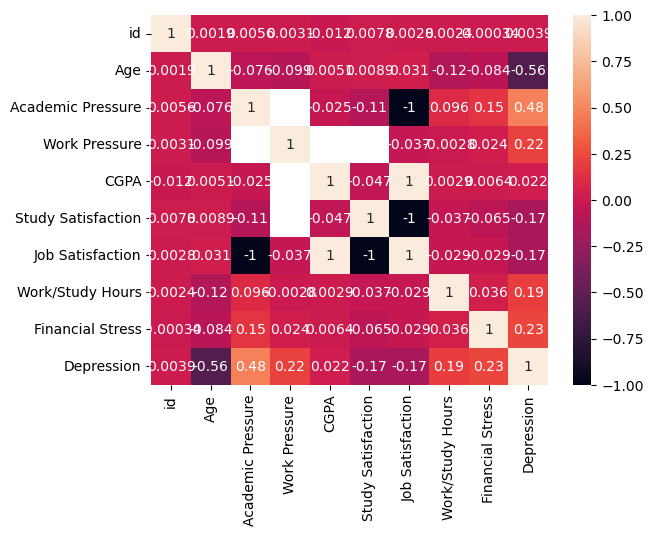

In [7]:
#по тепловой карте видим, что числовые признаки хорошо коррелируют с целевой
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [12]:
df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [141]:
#составляем таблицы смежности для анализа связи целевой перемнной с категориальными признакми
for cat in categories:
    ct = pd.crosstab(index=df[cat],columns=df.Depression)
    print(ct)
    print()
#некоторые признаки стоит посмотреть после преобразования, но уже видно, что в большом количестве категорий корреляция есть

Depression      0      1
Gender                  
Female      51965  11271
Male        63168  14296

Depression        0     1
City                     
3.0               0     1
Aaradhya          1     0
Aditya            1     0
Agra           3783   901
Ahmedabad      4390  1223
...             ...   ...
Varanasi       3951   655
Vasai-Virar    4624  1141
Vidhi             1     0
Vidya             3     0
Visakhapatnam  4352   824

[98 rows x 2 columns]

Depression                            0      1
Working Professional or Student               
Student                           11565  16336
Working Professional             103568   9231

Depression               0    1
Profession                     
Academic                 5    0
Accountant            1253   86
Analyst                  1    0
Architect             3937  433
B.Com                    1    0
...                    ...  ...
Unveil                   1    0
Visakhapatnam            1    0
Working Professional     1  

<Axes: >

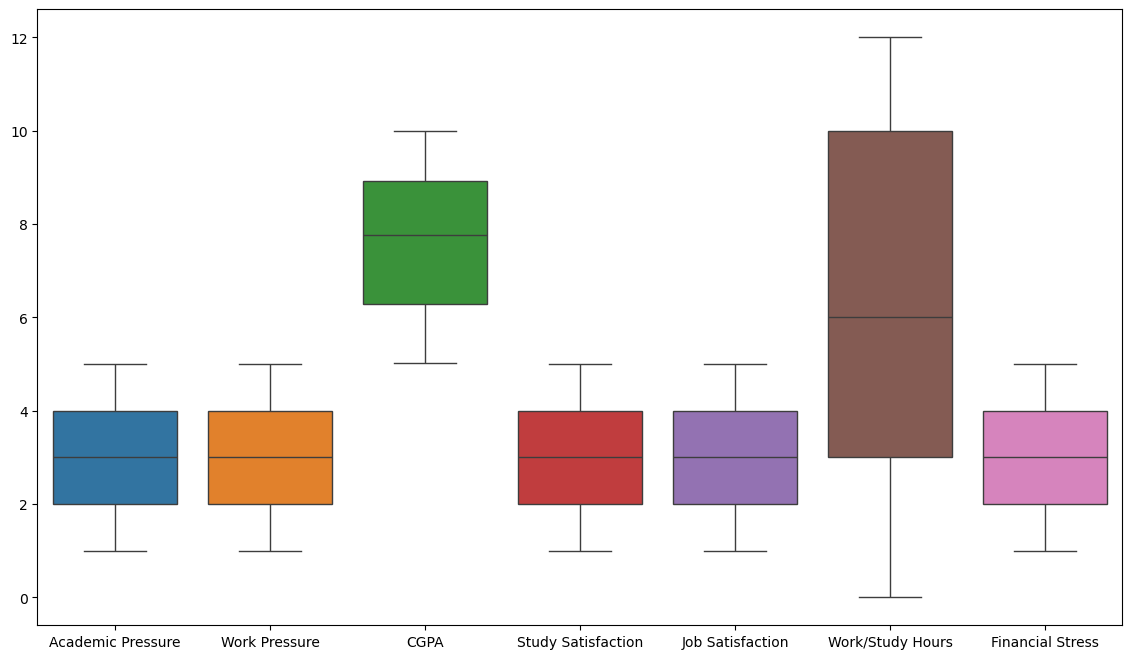

In [77]:
df.duplicated().any()
#дублей нет

False

In [82]:
#чистим данные

In [142]:
#высчитываем те самые пороговые значения
mp_professions =  df['Profession'].value_counts().head(35).index
mp_sleep = df['Sleep Duration'].value_counts().head(4).index
mp_dietary =df['Dietary Habits'].value_counts().head(3).index
mp_degree = df['Degree'].value_counts().head(27).index
mp_city = df['City'].value_counts().head(30).index

In [143]:
#заменяем, оставив пороговые, остальное на единое значение
df['Sleep Duration'] = df['Sleep Duration'].apply(lambda x: x if x in mp_sleep else "Other")
df['Dietary Habits'] = df['Dietary Habits'].apply(lambda x: x if x in mp_dietary else "Other")
df['Degree'] = df['Degree'].apply(lambda x: x if x in mp_degree else "Other")
df['City'] = df['City'].apply(lambda x: x if x in mp_city else "Other")
df['Profession'] = df['Profession'].apply(lambda x: x if x in mp_professions else "Other")

In [144]:
#Обрабатываем коррелирующие NaN 
#Если человек работает и признак относится к студенту(или наоборот), то меняем на -1(те отсутствие)
#Иначе меняем на медиану
working_work_median = df[df['Working Professional or Student'] == 'Working Professional']['Work Pressure'].median()
student_acad_median = df[df['Working Professional or Student'] == 'Student']['Academic Pressure'].median()

work_student_mask = (df['Work Pressure'].isna()) & (df['Working Professional or Student'] == 'Student')
work_working_mask = (df['Work Pressure'].isna()) & (df['Working Professional or Student'] == 'Working Professional')

df.loc[work_student_mask, 'Work Pressure'] = -1
df.loc[work_working_mask, 'Work Pressure'] = working_work_median


acad_working_mask = (df['Academic Pressure'].isna()) & (df['Working Professional or Student'] == 'Working Professional')
acad_student_mask = (df['Academic Pressure'].isna()) & (df['Working Professional or Student'] == 'Student')

df.loc[acad_working_mask, 'Academic Pressure'] = -1
df.loc[acad_student_mask, 'Academic Pressure'] = student_acad_median

In [145]:
student_cgpa_median = df[df['Working Professional or Student'] == 'Student']['CGPA'].median()
job_sts_median = df[df['Working Professional or Student'] == 'Working Professional']['Job Satisfaction'].median()
study_sts_median = df[df['Working Professional or Student'] == 'Student']['Study Satisfaction'].median()


In [146]:
job_student_mask = (df['Job Satisfaction'].isna()) & (df['Working Professional or Student'] == 'Student')
job_working_mask = (df['Job Satisfaction'].isna()) & (df['Working Professional or Student'] == 'Working Professional')

df.loc[job_student_mask, 'Job Satisfaction'] = -1
df.loc[job_working_mask, 'Job Satisfaction'] = job_sts_median


study_working_mask = (df['Study Satisfaction'].isna()) & (df['Working Professional or Student'] == 'Working Professional')
study_student_mask = (df['Study Satisfaction'].isna()) & (df['Working Professional or Student'] == 'Student')

df.loc[study_working_mask, 'Study Satisfaction'] = -1
df.loc[study_student_mask, 'Study Satisfaction'] = study_sts_median

cgpa_working_mask = (df['CGPA'].isna()) & (df['Working Professional or Student'] == 'Working Professional')
cgpa_student_mask = (df['CGPA'].isna()) & (df['Working Professional or Student'] == 'Student')

df.loc[cgpa_working_mask, 'CGPA'] = -1
df.loc[cgpa_student_mask, 'CGPA'] = student_cgpa_median

In [147]:
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].median())

In [148]:
df.isna().sum()
#чистый датасет

Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [149]:
df.to_csv(r'D:\практика ML\clear_train.csv')

In [150]:
for cat in categories:
    ct = pd.crosstab(index=df[cat],columns=df.Depression)
    print(ct)
    print()
#Видим наличие зависимостей

Depression      0      1
Gender                  
Female      51965  11271
Male        63168  14296

Depression        0     1
City                     
Agra           3783   901
Ahmedabad      4390  1223
Bangalore      3399   724
Bhopal         2667   808
Chennai        3258   786
Delhi          2904   689
Faridabad      2788   480
Ghaziabad      2914   706
Hyderabad      3259  1237
Indore         4088   784
Jaipur         3543   785
Kalyan         5275  1316
Kanpur         3845   553
Kolkata        4701   988
Lucknow        3364   916
Ludhiana       4219  1007
Meerut         4787   741
Mumbai         4314   652
Nagpur         3599   610
Nashik         2645   499
Other            79    19
Patna          4957   967
Pune           4371   839
Rajkot         4305   902
Srinagar       4000  1074
Surat          3700   936
Thane          3250  1039
Vadodara       3802   766
Varanasi       3951   655
Vasai-Virar    4624  1141
Visakhapatnam  4352   824

Depression                            0 